In [1]:
#.libPaths("/home/kostyadovnar/CVUT/BI-PRS/packages")
.libPaths("/home/senyaaa/BI-PRS/packages")

library(eurostat)
library(dplyr)
library(ggplot2)

#1 sudo apt-get install libfontconfig1-dev libfreetype6-dev 
#2 install.packages("systemfonts")
#3 install.packages("svglite")
#4 install.packages("kableExtra")
#5 install.packages("vtable")
library(vtable)

library(moments) 

options(width=160, repr.plot.width=12, repr.plot.height=8) 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: kableExtra


Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




In [2]:
surname <- "pogodin"
L <- nchar(surname)
K <- 4
M <- ((K + L) * 47) %% 11 + 1
print(M)

[1] 1


## Import datasetu

Budeme uvažovat data z roku 2011+1 (2012) a HDP všech evropských zemí, o kterých jsou k dispozici pro daný rok údaje. Zajímat nás bude výpočet v tržních cenách (na_item=="B1GQ") a vyjádření v eurech na obyvatele (unit=="CP_EUR_HAB").

In [98]:
data <- get_eurostat(id = "nama_10_pc")

Dataset query already saved in cache_list.json...

Reading cache file /tmp/Rtmp1ES4Ka/eurostat/f4997aa2f7694ea22e9f47e073a519e1.rds

Table  nama_10_pc  read from cache file:  /tmp/Rtmp1ES4Ka/eurostat/f4997aa2f7694ea22e9f47e073a519e1.rds



In [99]:
data <- data %>%
  filter(na_item == "B1GQ" & unit == "CP_EUR_HAB" & TIME_PERIOD == as.Date("2012-01-01"))
data <- filter(data, !is.na(values))

V datasetu a sloupci geo vidíme položky jako je EA12 (Euro area - 12 countries (2001-2006)), EU15 atd, které pro nás irrelevatní, tak je odstraníme. Navíc odstraníme sloupce jako je frequency, unit, na_item, TIME_PERIOD

In [100]:
data

freq,unit,na_item,geo,TIME_PERIOD,values
<chr>,<chr>,<chr>,<chr>,<date>,<dbl>
A,CP_EUR_HAB,B1GQ,AL,2012-01-01,3300
A,CP_EUR_HAB,B1GQ,AT,2012-01-01,37820
A,CP_EUR_HAB,B1GQ,BE,2012-01-01,34770
A,CP_EUR_HAB,B1GQ,BG,2012-01-01,5780
A,CP_EUR_HAB,B1GQ,CH,2012-01-01,66780
A,CP_EUR_HAB,B1GQ,CY,2012-01-01,22570
A,CP_EUR_HAB,B1GQ,CZ,2012-01-01,15470
A,CP_EUR_HAB,B1GQ,DE,2012-01-01,34130
A,CP_EUR_HAB,B1GQ,DK,2012-01-01,45530


In [101]:
data$freq <- NULL
data$unit <- NULL
data$na_item <- NULL
data$TIME_PERIOD <- NULL
data <- subset(data, !(geo %in% c("EA12", "EA19", "EA20", "EU15", "EU27_2020", "EU28", "EA")))
data <- data %>% 
  rename(GDP = values)

In [102]:
data

geo,GDP
<chr>,<dbl>
AL,3300
AT,37820
BE,34770
BG,5780
CH,66780
CY,22570
CZ,15470
DE,34130
DK,45530


## Úloha 1

* Krátce prezentujte rozdělení HDP a jeho charakteristiky číselně i graficky.
* Diskutujte, které údaje o zemích by mohly mít na HDP vliv.

Z rychlého pohledu na histogram bych řekl, že data nejsou normálně rozdělená. V boxplotu vidíme dva outliery Luxemburg a Norsko.

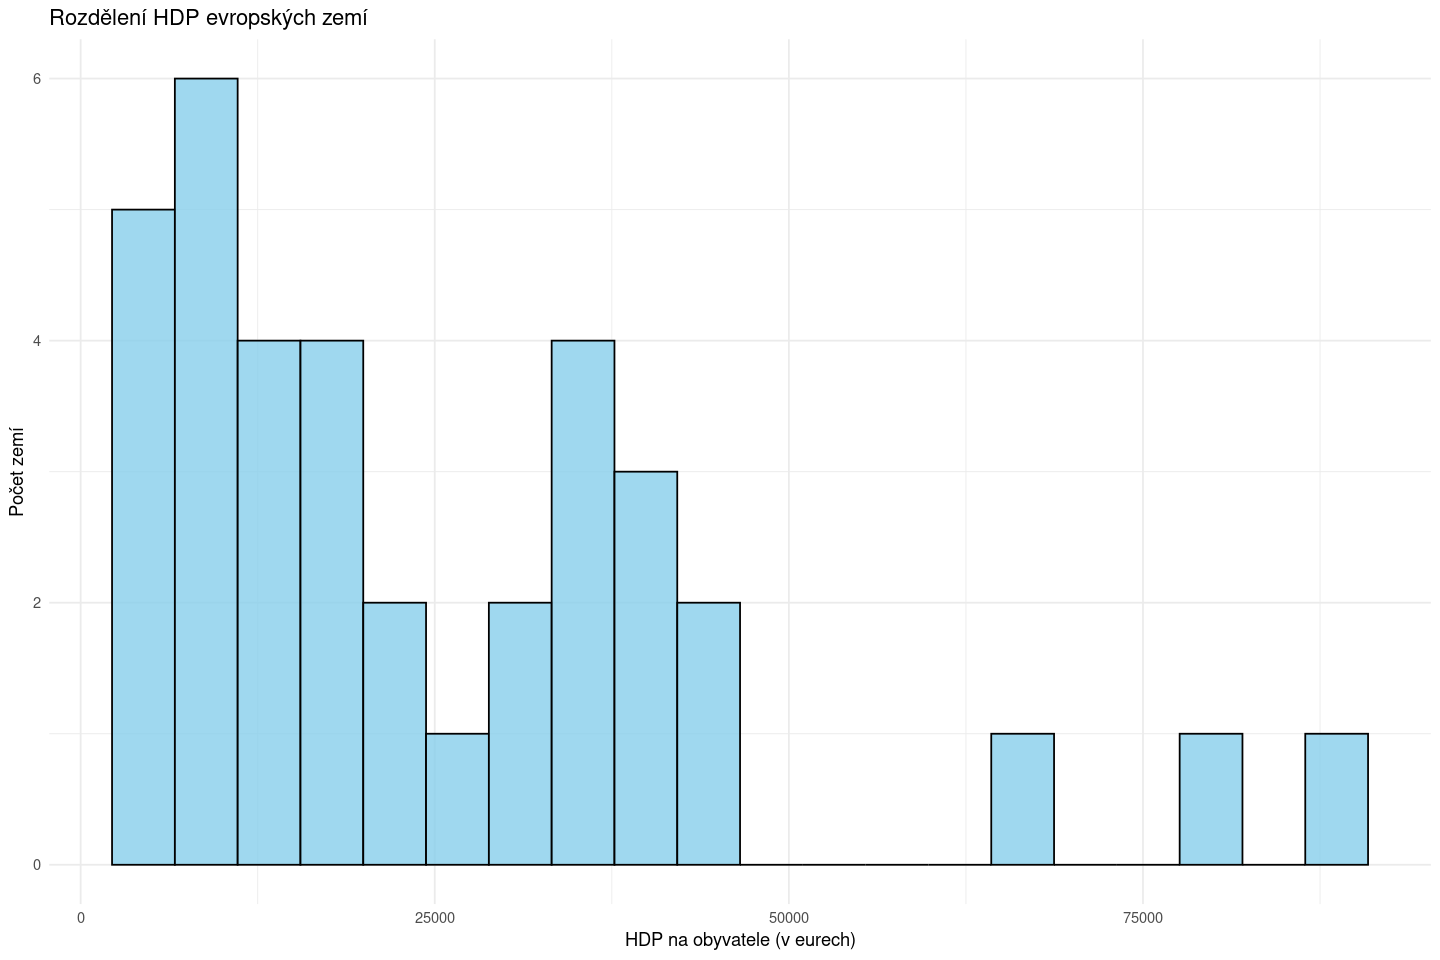

Průměr HDP: 25560.56 
Medián HDP: 17585 
Standardní odchylka HDP: 20615.88 
První kvartil HDP: 10387.5 
Medián HDP: 17585 
Třetí kvartil HDP: 36132.5 
Rozsah HDP: 84240 


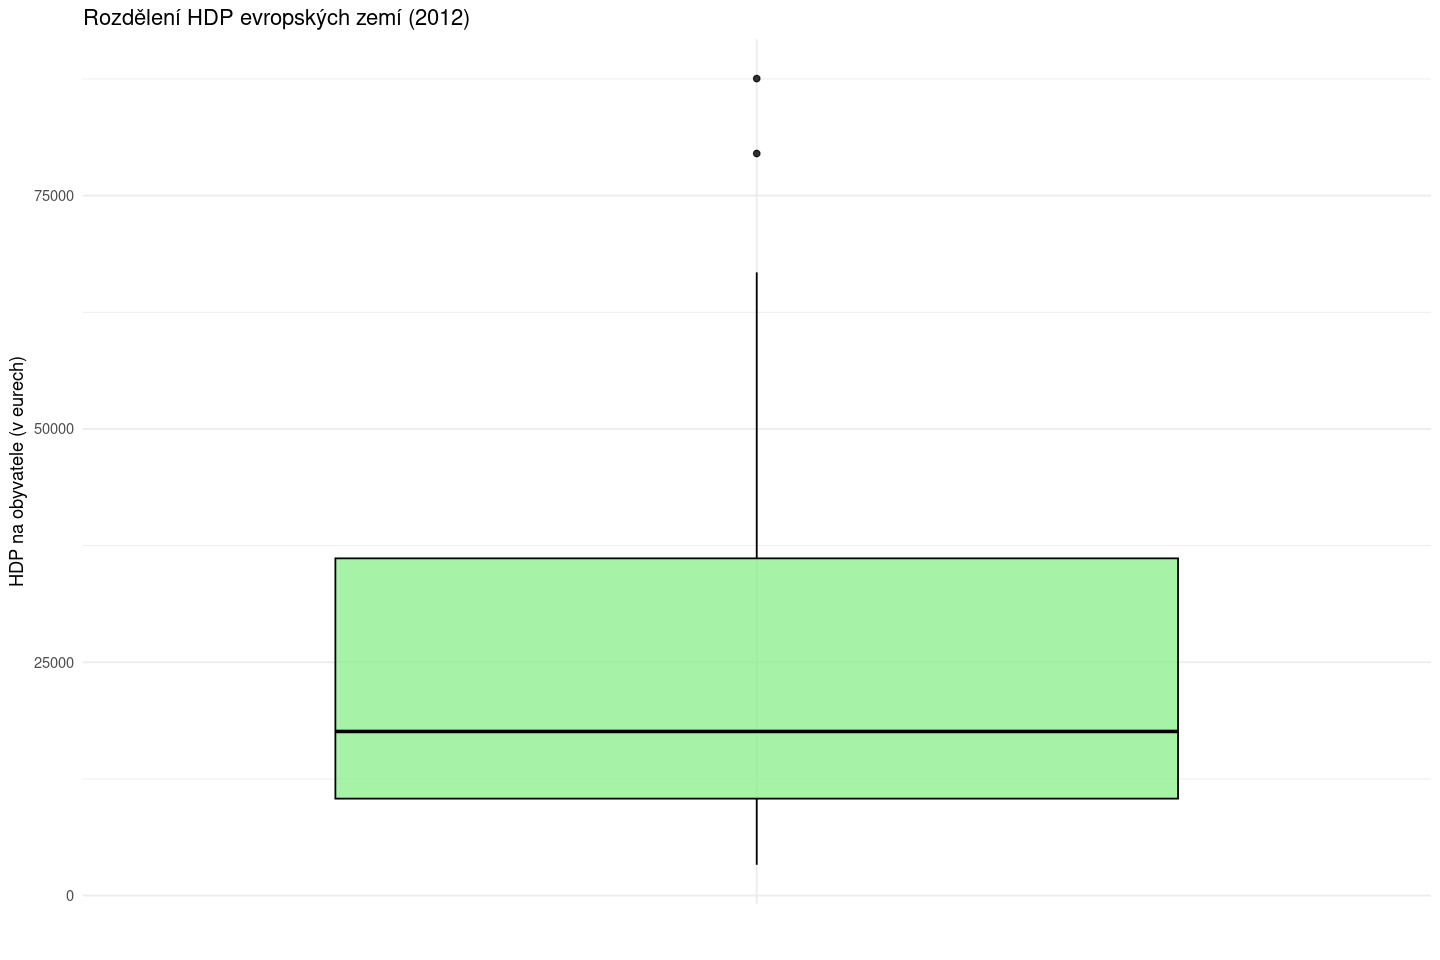

In [103]:
summary_stats <- summary(data$GDP)
mean_hdp <- mean(data$GDP)
median_hdp <- median(data$GDP)
std_dev_hdp <- sd(data$GDP)
quartiles_hdp <- quantile(data$GDP, probs = c(0.25, 0.5, 0.75))
range_hdp <- range(data$GDP)

ggplot(data, aes(x = GDP)) +
  geom_histogram(bins = 20, fill = "skyblue", color = "black", alpha = 0.8) +
  labs(title = "Rozdělení HDP evropských zemí",
       x = "HDP na obyvatele (v eurech)",
       y = "Počet zemí") +
  theme_minimal()

ggplot(data, aes(x = "", y = GDP)) +
  geom_boxplot(fill = "lightgreen", color = "black", alpha = 0.8) +
  labs(title = "Rozdělení HDP evropských zemí (2012)",
       x = "",
       y = "HDP na obyvatele (v eurech)") +
  theme_minimal()

cat("Průměr HDP:", mean_hdp, "\n")
cat("Medián HDP:", median_hdp, "\n")
cat("Standardní odchylka HDP:", std_dev_hdp, "\n")
cat("První kvartil HDP:", quartiles_hdp[1], "\n")
cat("Medián HDP:", quartiles_hdp[2], "\n")
cat("Třetí kvartil HDP:", quartiles_hdp[3], "\n")
cat("Rozsah HDP:", range_hdp[2] - range_hdp[1], "\n")

Existuje několik možných důvodů, proč by Lucembursko a Norsko mohly tvořit outliery 

1) Lucembursko a Norsko jsou známé svou vysokou úrovní ekonomické prosperity a bohatství.
2) Luxemburg - nízké daně z příjmu právnických osob, stabilní pracovní sila a vládní pobídka v oblasti investic, což při malém počtu obyvatel vede k neobvykle vysokému HDP na obyvatele.
3) Norsko - díky úspěchu v odvětví ropy a zemního plynu a v dalších špičkových průmyslových odvětvích, jako je lodní doprava, stavba lodí a akvakultura.

In [104]:
outliers <- boxplot.stats(data$GDP)$out

sorted_indices <- order(outliers, decreasing = TRUE)
sorted_outliers <- outliers[sorted_indices]

top_outliers <- sorted_outliers[1:3]

top_outlier_countries <- data$geo[which(data$GDP %in% top_outliers)]

top_outlier_countries

[1] "LU" "NO"

Q-Q plot, česky též kvantilový graf, vykresluje polohy výběrových kvantilů (z dat) versus polohy kvantilů vybraného teoretického rozdělení (např. normálního). Pokud by výběrové kvantily odpovídaly danému rozdělení, pak by ležely na přímce reprezentující právě toto rozdělení. Zase rychlým pohledem na Q-Q plot s normálním a exponenciálním rozdělením bych tipnul, že netvoří ani jedno z těchto rozdělení.

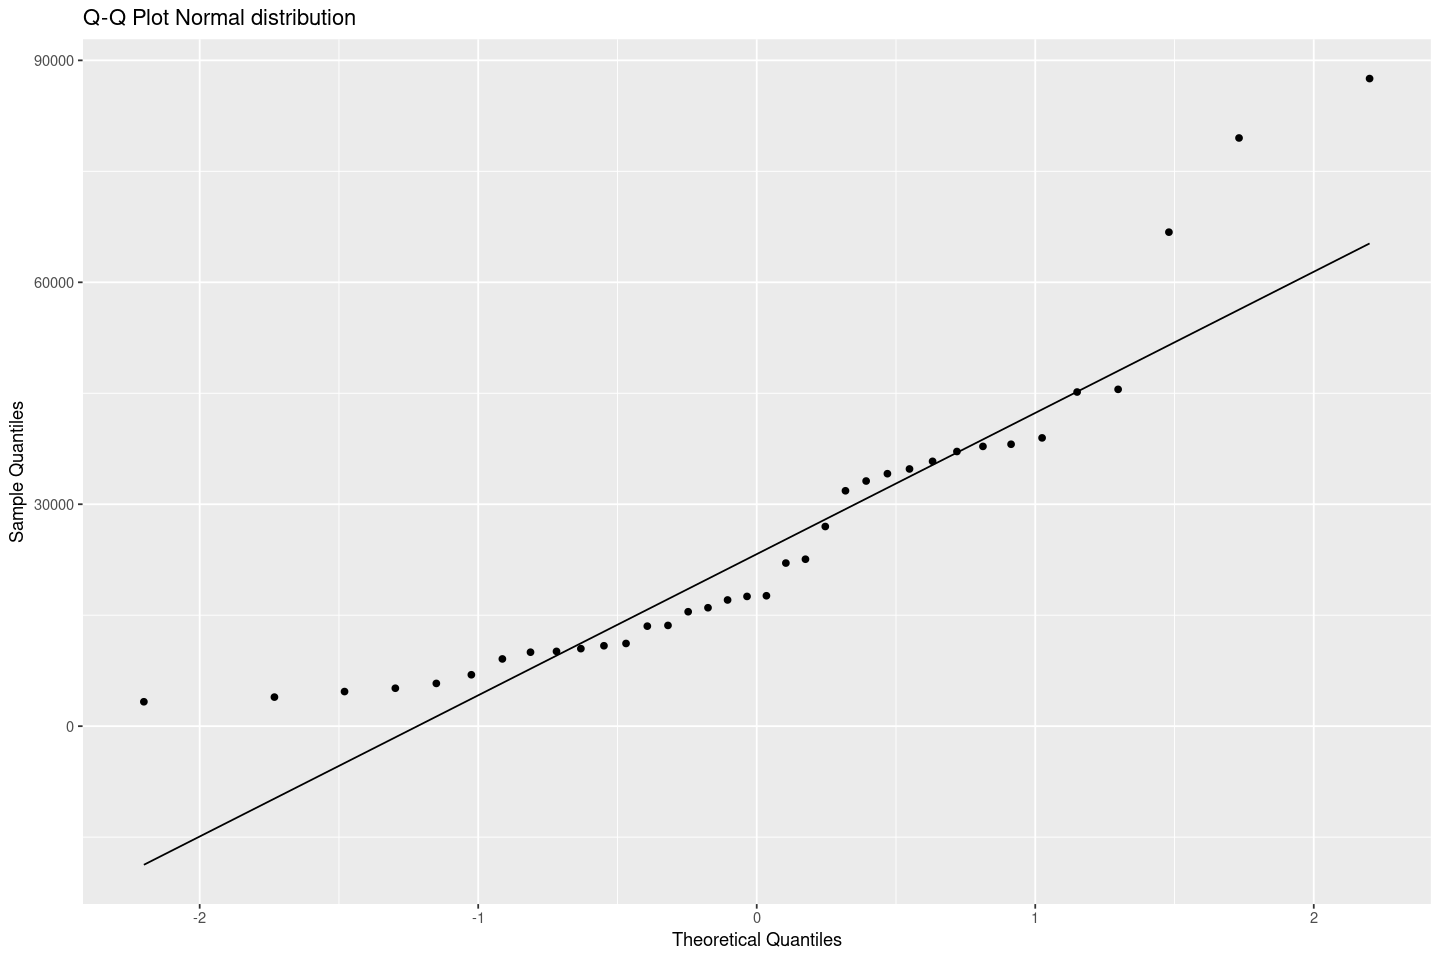

In [105]:
p1 <- ggplot(data, aes(sample = GDP)) +
  stat_qq(distribution = qnorm) +
  stat_qq_line(distribution = qnorm) +
  labs(title = "Q-Q Plot Normal distribution",
       x = "Theoretical Quantiles",
       y = "Sample Quantiles")

print(p1)

Test Jarque-Bera je statistický test normality. 

Nulová hypotéza testu Jarque-Bera je, že data pocházejí z normálního rozdělení. Zamítáme nulovou hypotézu ve prospěch alternativní hypotézy, protože hodnota p (0.0006412) menší než 0.05. Máme dostatečné důkazy k zamítnutí nulové hypotézy a přijetí alternativní hypotézy, že data nejsou normálně distribuovaná.


In [106]:
jarque.test(data$GDP)


	Jarque-Bera Normality Test

data:  data$GDP
JB = 14.704, p-value = 0.0006412
alternative hypothesis: greater


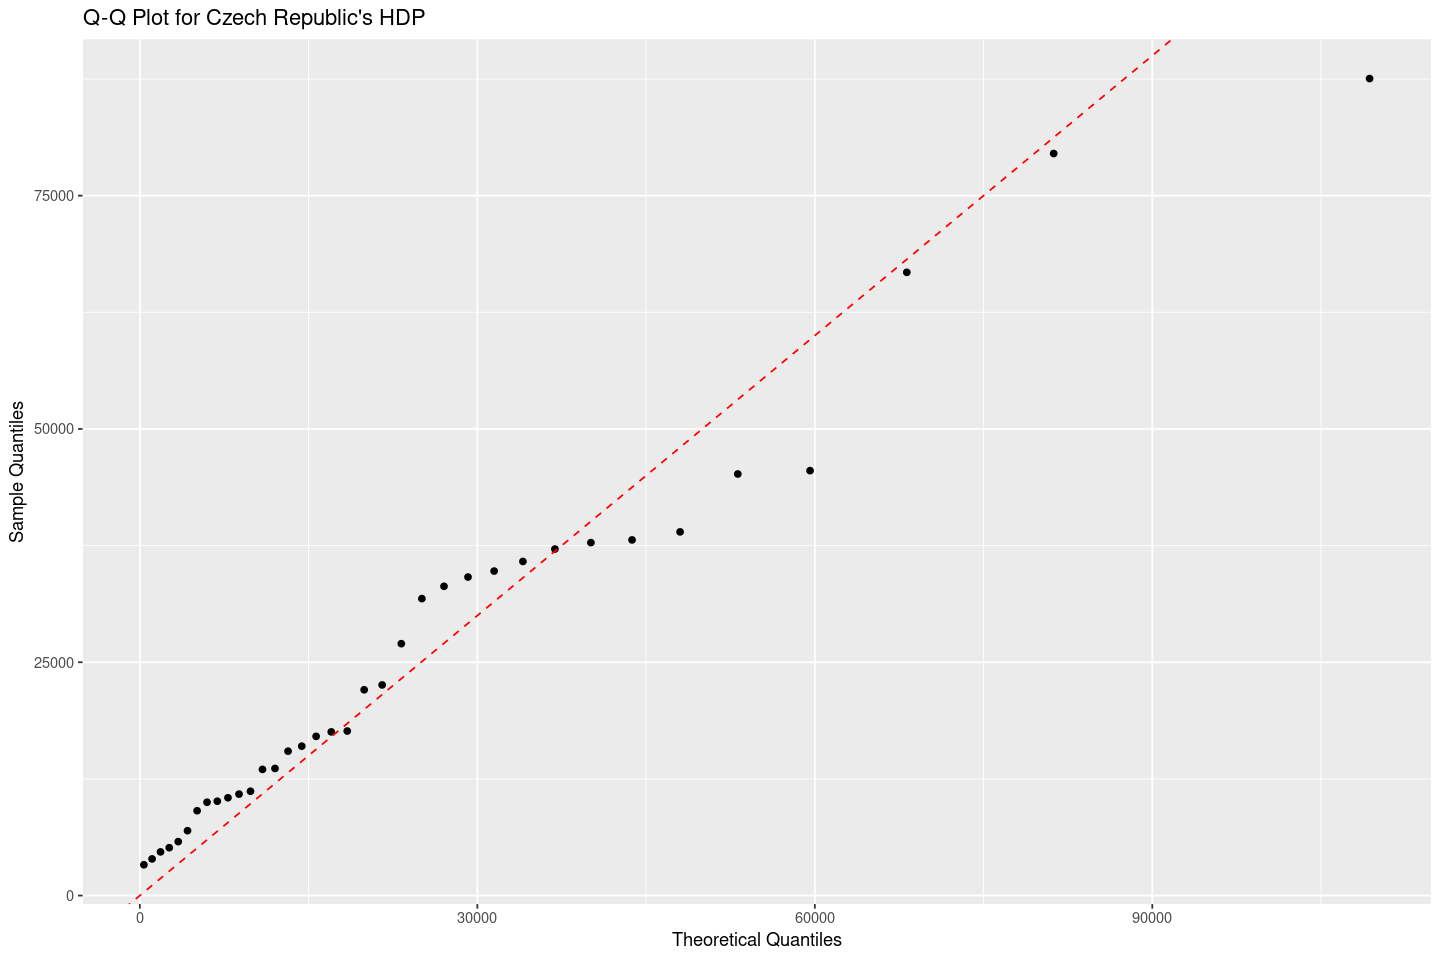

In [107]:
xp_quantiles <- qexp(seq(0.01, 0.99, by = 0.01), rate = 1/mean(data$GDP))

p2 <- ggplot(data, aes(sample = GDP)) +
  stat_qq(distribution = qexp, dparams = list(rate = 1/mean(data$GDP))) +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(title = "Q-Q Plot for Czech Republic's HDP",
       x = "Theoretical Quantiles",
       y = "Sample Quantiles")

print(p2)

### Diskuse o vlivu na HDP
Jeden z možných způsobu jak vypočítat HDP je pomocí této formule:

$GDP = Consumption+Government Spending+Investment+Net Export$ [source link](https://www.investopedia.com/terms/g/gdp.asp)

* Spotřeba (Consumption) se týká výdajů na soukromou spotřebu nebo spotřebitelských výdajů. Spotřebitelé utrácejí peníze za zboží a služby, například za nákup potravin nebo za stříhání vlasů
* Vládní výdaje (Government Spending) představují výdaje na vládní spotřebu a hrubé investice. Vlády utrácejí peníze za vybavení, infrastrukturu a mzdy. Vládní výdaje mohou nabýt na významu ve srovnání s ostatními složkami HDP dané země, když spotřebitelské výdaje i podnikatelské investice prudce klesají. (K tomu může dojít například v důsledku recese.)
* Investice se týkají soukromých domácích investic nebo kapitálových výdajů. Podniky vynakládají peníze na investice do svých podnikatelských aktivit. Podnik může například nakoupit strojní zařízení. Podnikatelské investice jsou rozhodující složkou HDP, protože zvyšují výrobní kapacitu ekonomiky a zvyšují úroveň zaměstnanosti.
* Vzorec pro čistý vývoz odečte celkový vývoz od celkového dovozu (NX = vývoz - dovoz). Zboží a služby, které ekonomika vyrábí a vyváží do jiných zemí, snížené o dovoz, který nakupují domácí spotřebitelé, představují čistý vývoz země. Do tohoto výpočtu jsou zahrnuty všechny výdaje společností sídlících v dané zemi, i když se jedná o zahraniční společnosti.
* Klimatické podmínky, geografická poloha a infrastruktura mohou mít vliv na ekonomický růst a produktivitu.
* Hospodářská politika vlády



## Úloha 2:

[Consumption and government spending dataset](https://ec.europa.eu/eurostat/databrowser/view/gov_10a_main__custom_11325103/default/table?lang=en) 

* Použijeme pro ziskání vládních výdajů ([TE]Total general government expenditure), spotřeby ([P3]Final consumption expenditure). Jako unit of measure budeme mít Million euro a sektor [S13] General government. Tato kategorie zahrnuje celkové výdaje veřejného sektoru včetně centrální vlády, státních vlád, místních samospráv a fondů sociálního zabezpečení

* Total general government expenditure: kategorie zahrnuje celkové výdaje vlády, včetně výdajů na vládní spotřebu (například na veřejné služby, mzdy zaměstnanců ve veřejném sektoru) a hrubé investice (například investice do infrastruktury, vzdělávání, zdravotnictví apod.)
* Final consumption expenditure: Jedná se o konečné spotřebitelské výdaje, které zahrnují výdaje domácností na zboží a služby pro osobní spotřebu

[Net export dataset](https://ec.europa.eu/eurostat/databrowser/view/ds-018995__custom_11325190/default/table?lang=en)
* Použijeme pro ziskání Netexport. Z nějakého důvodu tento dataset nelze stahnout pomocí příkazu get_eurostat, musel jsem to stahnout ručně s hodnotami IMPORT a EXPORT, kde jednotky jsou uvedené v euro, následně výpočítat EXPORT - IMPORT a převést na milliony euro, abychom měli konzistentní jednotky

Jako kategorický příznak použijeme, zdá se v této zemí platí eurem nebo ne.

Tedy budeme mít čtyři údaje:
1) Vladní výdaje
2) Spotřeba
3) Netexport
4) Zdá se platí eurem


### Vládní výdaje

In [108]:
government_spending <- get_eurostat(id = "gov_10a_main")

Dataset query already saved in cache_list.json...

Reading cache file /tmp/Rtmp1ES4Ka/eurostat/ec7b0c22c78825425a8afe852d6f83a6.rds

Table  gov_10a_main  read from cache file:  /tmp/Rtmp1ES4Ka/eurostat/ec7b0c22c78825425a8afe852d6f83a6.rds



In [109]:
government_spending <- government_spending %>%
  filter(na_item == "TE" & sector == "S13" & unit == "MIO_EUR" & TIME_PERIOD == as.Date("2012-01-01"))

In [110]:
government_spending$freq <- NULL 
government_spending$unit <- NULL
government_spending$sector <- NULL
government_spending$na_item <- NULL
government_spending$TIME_PERIOD <- NULL 
government_spending <- subset(government_spending, !(geo %in% c("EA19", "EA20", "EU15", "EU27_2020", "EU28")))
government_spending <- government_spending %>% rename(spending = values)

In [111]:
merged_data <- merge(data, government_spending, by = "geo", all.x = TRUE)
merged_data

geo,GDP,spending
<chr>,<dbl>,<dbl>
AL,3300,NA
AT,37820,163191.9
BE,34770,218102.1
BG,5780,14476.0
CH,66780,174563.9
CY,22570,8205.4
CZ,15470,72636.1
DE,34130,1233138.0
DK,45530,147540.5


### Spotřeba

In [112]:
consumption <- get_eurostat(id = "gov_10a_main")
consumption <- consumption %>%
  filter(na_item == "P3" & sector == "S13" & unit == "MIO_EUR" & TIME_PERIOD == as.Date("2012-01-01"))

Dataset query already saved in cache_list.json...

Reading cache file /tmp/Rtmp1ES4Ka/eurostat/ec7b0c22c78825425a8afe852d6f83a6.rds

Table  gov_10a_main  read from cache file:  /tmp/Rtmp1ES4Ka/eurostat/ec7b0c22c78825425a8afe852d6f83a6.rds



In [113]:
consumption$freq <- NULL 
consumption$unit <- NULL
consumption$sector <- NULL
consumption$na_item <- NULL
consumption$TIME_PERIOD <- NULL 
consumption <- subset(consumption, !(geo %in% c("EA19", "EA20", "EU15", "EU27_2020", "EU28")))
consumption <- consumption %>% rename(consumption = values)

In [114]:
merged_data <- merge(merged_data, consumption, by = "geo", all.x = TRUE)
merged_data

geo,GDP,spending,consumption
<chr>,<dbl>,<dbl>,<dbl>
AL,3300,NA,NA
AT,37820,163191.9,63286.7
BE,34770,218102.1,93853.4
BG,5780,14476.0,6672.6
CH,66780,174563.9,60423.2
CY,22570,8205.4,3657.6
CZ,15470,72636.1,31627.4
DE,34130,1233138.0,529210.0
DK,45530,147540.5,67390.5


### Net export

Z nějakého důvodu tento dataset nejde stahnout, ačkoliv ID je korektní. Musím to udělat ručně.

In [47]:
net_export <- get_eurostat(id = "ds-018995")

Dataset query already saved in cache_list.json...

Warning message in utils::download.file(url, tfile):
“downloaded length 0 != reported length 0”
Warning message in utils::download.file(url, tfile):
“cannot open URL 'https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/ds-018995?format=TSV&compressed=true': HTTP status was '404 Not Found'”


ERROR: Error in get_eurostat(id = "ds-018995"): get_eurostat_raw fails with the id ds-018995


In [48]:
srch <- search_eurostat(pattern='ds-018995')
srch

title,code,type,last.update.of.data,last.table.structure.change,data.start,data.end,values,hierarchy
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>


In [115]:
iso_codes <- c("AT", "BE", "BG", "CY", "CZ", "DE", "DK", "EE", "ES", "FI", "FR", "UK", "GR", "HR", "HU", "IE", "IT", "LT", "LU", "LV", 
               "MT", "NL", "PL", "PT", "RO", "SE", "SI", "SK")
numbers <- c(-9263888500, 5301097222, -4689011720, -4324366075, 12164454752, 191672383879, 11882664818, -1555878385, -32758768516,
             -2639245886, -82274908458, -173553722109, -20488303047, -6585745311, 6533296007, 37616936666, 9889611000, -1831640682, 
             -6569582335, -2425268983, -1827085904, 53274410334, -10651734804, -11161067261, -9624697962, 6155940741, 99579822, 
             2540358306)
numbers <- numbers / 1000000
netexport <- data.frame(geo = iso_codes, netexport = numbers)

Můžeme vidět, že spoustu hodnot nám chybí a nejsou v datasetech od eurostatu. Pokusím se najít hodnoty z externích zdrojů.

In [116]:
merged_data <- merge(merged_data, netexport, by = "geo", all.x = TRUE)
merged_data

geo,GDP,spending,consumption,netexport
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
AL,3300,NA,NA,NA
AT,37820,163191.9,63286.7,-9263.88850
BE,34770,218102.1,93853.4,5301.09722
BG,5780,14476.0,6672.6,-4689.01172
CH,66780,174563.9,60423.2,NA
CY,22570,8205.4,3657.6,-4324.36607
CZ,15470,72636.1,31627.4,12164.45475
DE,34130,1233138.0,529210.0,191672.38388
DK,45530,147540.5,67390.5,11882.66482


In [117]:
merged_data[1,"spending"] <- 2684.019 # albania https://ndiqparate.al/?p=9276&lang=en
merged_data[23,"spending"]<- 2963.1 # montenegro https://nso.gov.mt/wp-content/uploads/News2014_019.pdf
merged_data[24,"spending"]<- 2770 # macedonia source chat gpt, nenasel jsem nikde jinde
merged_data[31, "spending"] <-6127.12 # serbia https://tradingeconomics.com/serbia/government-spending
merged_data[35, "spending"] <- 16960.78 # turkey https://tradingeconomics.com/turkey/government-spending
merged_data[36, "spending"] <- 814962 # uk https://assets.publishing.service.gov.uk/media/5a7ad0afed915d71db8b2aa7/National_statistics_release_October_2012.pdf

merged_data[1,"consumption"] <- 7500 #https://www.macrotrends.net/global-metrics/countries/ALB/albania/consumer-spending
merged_data[23,"consumption"] <- 2640 # https://www.macrotrends.net/global-metrics/countries/MNE/montenegro/consumer-spending
merged_data[24, "consumption"] <- 5606.32 # https://www.macrotrends.net/global-metrics/countries/MKD/north-macedonia/consumer-spending
merged_data[31, "consumption"] <- 25437 # https://www.macrotrends.net/global-metrics/countries/SRB/serbia/consumer-spending
merged_data[35, "consumption"] <- 50679 # https://www.macrotrends.net/global-metrics/countries/TUR/turkey/consumer-spending
merged_data[36, "consumption"] <- 143707.46 # https://www.ons.gov.uk/economy/nationalaccounts/satelliteaccounts/timeseries/abjr/pn2

merged_data[1,"netexport"] <- -2265.7 #https://wits.worldbank.org/CountryProfile/en/Country/ALB/Year/2012/Summary
merged_data[5,"netexport"] <- 13383.8 #https://wits.worldbank.org/CountryProfile/en/Country/CHE/Year/2012/Summarytext
merged_data[11, "netexport"] <- -27353 #https://wits.worldbank.org/CountryProfile/en/Country/GRC/Year/2012/Summarytext
merged_data[18, "netexport"] <- 291 #https://www.macrotrends.net/global-metrics/countries/ISL/iceland/exports
merged_data[23,"netexport"] <- -1452.21 # https://wits.worldbank.org/CountryProfile/en/Country/MNT/Year/2012/Summarytext
merged_data[24, "netexport"] <- -896 # https://webgate.ec.europa.eu/isdb_results/factsheets/country/details_north-macedonia_en.pdf
merged_data[27, "netexport"] <- 57302.18 #https://wits.worldbank.org/CountryProfile/en/Country/NOR/Year/2012/Summarytext
merged_data[31, "netexport"] <- 12070 #https://www.macrotrends.net/global-metrics/countries/SRB/serbia/exports
merged_data[35, "netexport"] <- 166840 #https://www.macrotrends.net/global-metrics/countries/TUR/turkey/exports

In [118]:
merged_data

geo,GDP,spending,consumption,netexport
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
AL,3300,2684.019,7500.00,-2265.70000
AT,37820,163191.900,63286.70,-9263.88850
BE,34770,218102.100,93853.40,5301.09722
BG,5780,14476.000,6672.60,-4689.01172
CH,66780,174563.900,60423.20,13383.80000
CY,22570,8205.400,3657.60,-4324.36607
CZ,15470,72636.100,31627.40,12164.45475
DE,34130,1233138.000,529210.00,191672.38388
DK,45530,147540.500,67390.50,11882.66482


### Kategorický př

In [89]:
countries <- c("AL", "AT", "BE", "BG", "CH", "CY", "CZ", "DE", "DK", "EE", "EL", 
               "ES", "FI", "FR", "HR", "HU", "IE", "IS", "IT", "LT", "LU", "LV", 
               "ME", "MK", "MT", "NL", "NO", "PL", "PT", "RO", "RS", "SE", "SI", 
               "SK", "TR", "UK")

In [95]:
uses_euro <- function(country_code) {
  euro_countries <- c("AT", "BE", "CY", "EE", "FI", "FR", "DE", "GR", "IE", 
                      "IT", "LV", "LT", "LU", "MT", "NL", "PT", "SK", "SI", 
                      "ES", "ME")
  if (country_code %in% euro_countries) {
    return("Yes")
  } else {
    return("No")
  }
}
euro_usage <- sapply(countries, uses_euro)
euro_data <- data.frame(geo = countries, Euro_Usage = euro_usage)

Nyní máme 4 regresory a můžeme přístoupit k dalším částem

In [96]:
merged_data <- merge(merged_data, euro_data, by = "geo", all.x = TRUE)
merged_data

geo,GDP,spending,consumption,netexport,Euro_Usage
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AL,3300,2684.019,7500.00,-2265.70000,No
AT,37820,163191.900,63286.70,-9263.88850,Yes
BE,34770,218102.100,93853.40,5301.09722,Yes
BG,5780,14476.000,6672.60,-4689.01172,No
CH,66780,174563.900,60423.20,13383.80000,No
CY,22570,8205.400,3657.60,-4324.36607,Yes
CZ,15470,72636.100,31627.40,12164.45475,No
DE,34130,1233138.000,529210.00,191672.38388,Yes
DK,45530,147540.500,67390.50,11882.66482,No
